<a href="https://colab.research.google.com/github/satyajitghana/PadhAI-Course/blob/master/16_PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set()
from tqdm import tqdm_notebook 

## Data loading

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

0it [00:00, ?it/s]

 99%|█████████▉| 168697856/170498071 [00:12<00:00, 17372362.42it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


## Visualise data

In [0]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [0]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [0]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


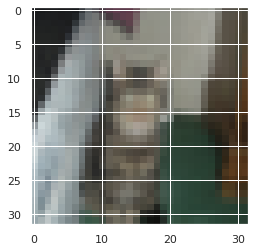

In [0]:
# plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

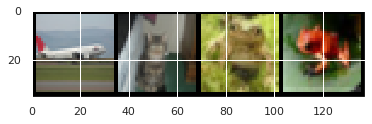

plane cat frog frog


In [0]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # 3=depth of input, 16=depth of output, padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [0]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [0]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [0]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


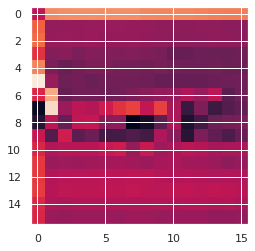

In [0]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [0]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

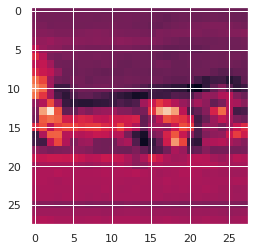

In [0]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [0]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

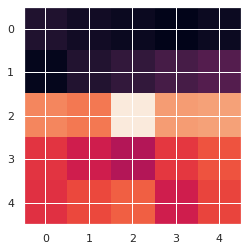

In [0]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [0]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [0]:
print(out)

tensor([[-1.5041e-01,  6.0973e-02,  1.1077e-01,  1.6792e-01, -4.4197e-05,
         -9.4120e-02, -4.9929e-03, -5.1180e-02, -5.0174e-02,  1.1286e-02],
        [-1.4711e-01,  5.4986e-02,  1.1074e-01,  1.4922e-01,  7.2940e-03,
         -9.6358e-02, -1.6733e-02, -4.4345e-02, -5.6173e-02,  3.0789e-02],
        [-1.4184e-01,  6.4094e-02,  1.0411e-01,  1.5147e-01, -5.6122e-03,
         -9.7452e-02, -1.3315e-02, -3.7054e-02, -5.2521e-02,  4.1820e-02],
        [-1.4405e-01,  6.3414e-02,  1.0522e-01,  1.4196e-01,  5.6484e-04,
         -8.6328e-02, -9.1592e-03, -2.8914e-02, -5.0737e-02,  6.8504e-02]],
       grad_fn=<AddmmBackward>)


In [0]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([3, 3, 3, 3])


## Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

170500096it [00:30, 17372362.42it/s]                               

Epoch: 0/16, Test acc: 38.06, Train acc: 38.45
Epoch: 1/16, Test acc: 42.39, Train acc: 42.48
Epoch: 2/16, Test acc: 46.11, Train acc: 47.08
Epoch: 3/16, Test acc: 49.62, Train acc: 50.51
Epoch: 4/16, Test acc: 51.65, Train acc: 52.92
Epoch: 5/16, Test acc: 52.50, Train acc: 54.87
Epoch: 6/16, Test acc: 53.30, Train acc: 56.29
Epoch: 7/16, Test acc: 53.87, Train acc: 58.12
Epoch: 8/16, Test acc: 54.12, Train acc: 58.99
Epoch: 9/16, Test acc: 54.93, Train acc: 60.31
Epoch: 10/16, Test acc: 54.51, Train acc: 61.30
Epoch: 11/16, Test acc: 55.37, Train acc: 62.45
Epoch: 12/16, Test acc: 55.55, Train acc: 62.73
Epoch: 13/16, Test acc: 56.22, Train acc: 64.03
Epoch: 14/16, Test acc: 55.96, Train acc: 64.79
Epoch: 15/16, Test acc: 54.99, Train acc: 64.93


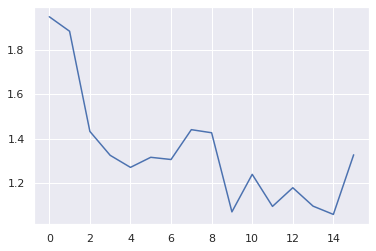

CPU times: user 8min 48s, sys: 9.19 s, total: 8min 57s
Wall time: 8min 59s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [0]:
torch.cuda.device_count()

1

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16 Loss: 1.7385966777801514 Test acc: 39.14 Train acc: 39.314
Epoch: 1/16 Loss: 1.7396268844604492 Test acc: 44.1 Train acc: 44.04
Epoch: 2/16 Loss: 1.6666606664657593 Test acc: 47.54 Train acc: 48.112
Epoch: 3/16 Loss: 1.4193602800369263 Test acc: 48.56 Train acc: 50.4
Epoch: 4/16 Loss: 1.3457355499267578 Test acc: 51.71 Train acc: 53.858
Epoch: 5/16 Loss: 1.4077545404434204 Test acc: 52.15 Train acc: 54.714
Epoch: 6/16 Loss: 1.3515287637710571 Test acc: 52.48 Train acc: 56.13
Epoch: 7/16 Loss: 1.3254845142364502 Test acc: 53.51 Train acc: 57.882
Epoch: 8/16 Loss: 1.0246491432189941 Test acc: 53.48 Train acc: 57.772
Epoch: 9/16 Loss: 1.0698554515838623 Test acc: 54.77 Train acc: 60.406
Epoch: 10/16 Loss: 1.0937621593475342 Test acc: 54.54 Train acc: 60.244
Epoch: 11/16 Loss: 1.1237317323684692 Test acc: 55.02 Train acc: 61.252
Epoch: 12/16 Loss: 1.119950771331787 Test acc: 54.51 Train acc: 62.454
Epoch: 13/16 Loss: 0.9621752500534058 Test acc: 55.98 Train acc: 63.918
Epoch: 1

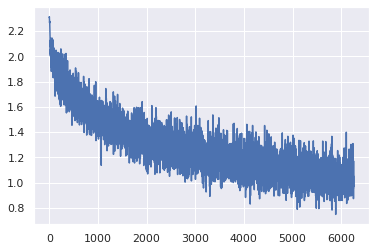

CPU times: user 4min 37s, sys: 1.88 s, total: 4min 38s
Wall time: 4min 39s


In [0]:
%%time
max_epochs = 16
loss_epoch_arr = []
for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_epoch_arr.append(loss.item())
        
    print('Epoch: {}/{} Loss: {} Test acc: {} Train acc: {}'.format(epoch, max_epochs, loss, evaluation(testloader), evaluation(trainloader)))
plt.plot(loss_epoch_arr)
plt.show()

In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.80, Train acc: 64.71


## Basic Visualisation

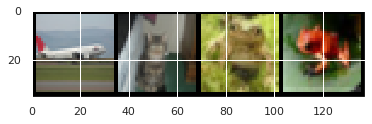

In [0]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [0]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [0]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

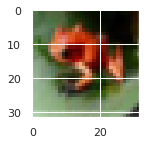

In [0]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


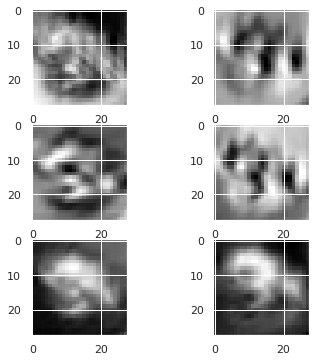

In [0]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

In [0]:
out = net.cnn_model[1](images)
out.shape

torch.Size([4, 3, 32, 32])

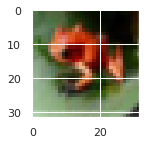

In [0]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


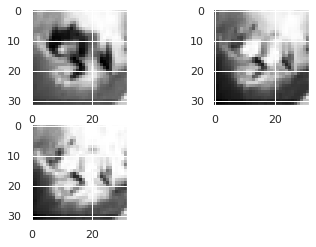

In [0]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(3):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()